In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Leer los archivos CSV
train_data = pd.read_csv("DailyDelhiClimateTrain.csv")
test_data = pd.read_csv("DailyDelhiClimateTest.csv")

In [3]:
# Mostrar las primeras filas para verificar la carga
print("Datos de entrenamiento:")
print(train_data.head())
print("\nDatos de prueba:")
print(test_data.head())

Datos de entrenamiento:
         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000

Datos de prueba:
         date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333


In [4]:
full_data = pd.concat([train_data, test_data], ignore_index=True)
print("\nDatos combinados:")
print(full_data.head())


Datos combinados:
         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


In [5]:
print("\nColumnas y tipos de datos:")
print(full_data.info())

print("\nEstadísticas descriptivas:")
print(full_data.describe())


Columnas y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1576 non-null   object 
 1   meantemp      1576 non-null   float64
 2   humidity      1576 non-null   float64
 3   wind_speed    1576 non-null   float64
 4   meanpressure  1576 non-null   float64
dtypes: float64(4), object(1)
memory usage: 61.7+ KB
None

Estadísticas descriptivas:
          meantemp     humidity   wind_speed  meanpressure
count  1576.000000  1576.000000  1576.000000   1576.000000
mean     25.221918    60.445229     6.899262   1010.593178
std       7.345014    16.979994     4.510725    175.242704
min       6.000000    13.428571     0.000000     -3.041667
25%      18.500000    49.750000     3.700000   1001.875000
50%      27.166667    62.440476     6.363571   1009.055556
75%      31.142857    72.125000     9.262500   1015.200000
max    

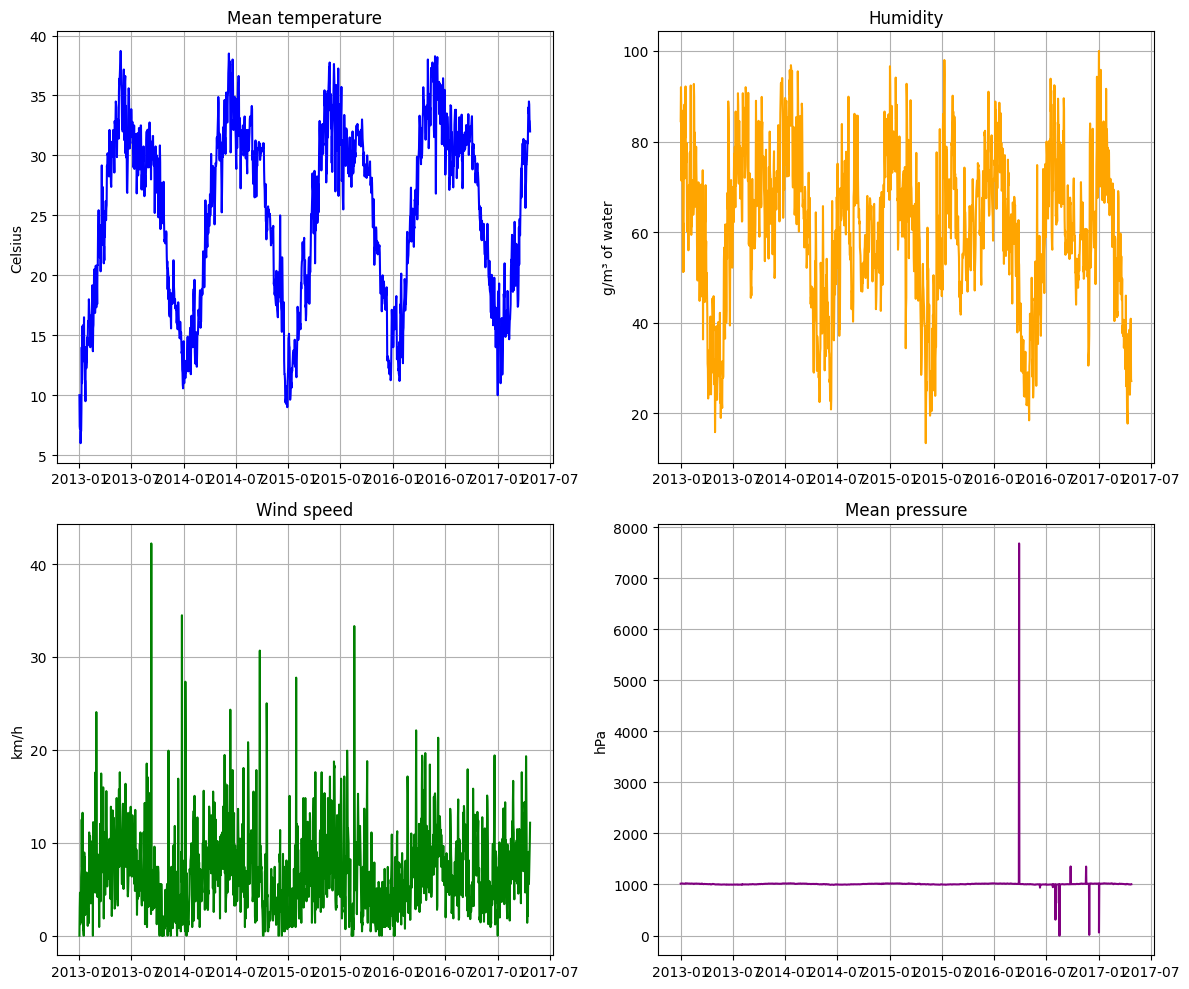

In [6]:
# Variables del DataFrame
dates = pd.to_datetime(full_data["date"])  # Convertir a formato de fechas
mean_temp = full_data["meantemp"]
humidity = full_data["humidity"]
wind_speed = full_data["wind_speed"]
mean_pressure = full_data["meanpressure"]

# Crear subgráficas
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Primera gráfica: Temperatura
axs[0, 0].plot(dates, mean_temp, color='blue')
axs[0, 0].set_title("Mean temperature")
axs[0, 0].set_ylabel("Celsius")
axs[0, 0].grid()

# Segunda gráfica: Humedad
axs[0, 1].plot(dates, humidity, color='orange')
axs[0, 1].set_title("Humidity")
axs[0, 1].set_ylabel("g/m³ of water")
axs[0, 1].grid()

# Tercera gráfica: Velocidad del viento
axs[1, 0].plot(dates, wind_speed, color='green')
axs[1, 0].set_title("Wind speed")
axs[1, 0].set_ylabel("km/h")
axs[1, 0].grid()

# Cuarta gráfica: Presión
axs[1, 1].plot(dates, mean_pressure, color='purple')
axs[1, 1].set_title("Mean pressure")
axs[1, 1].set_ylabel("hPa")
axs[1, 1].grid()

# Ajustar el espacio entre gráficas
plt.tight_layout()
plt.show()

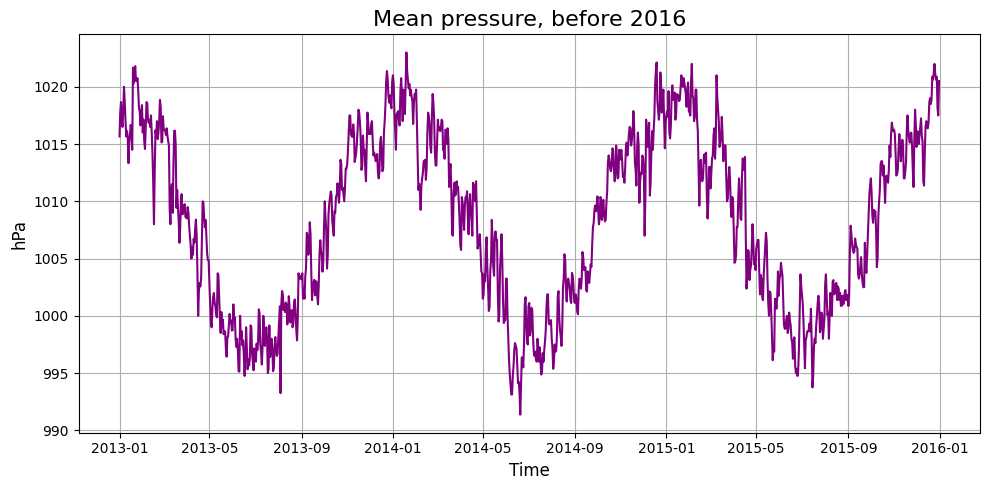

In [7]:
# Filtrar datos antes de 2016 y crear una copia explícita
filtered_data = full_data[pd.to_datetime(full_data["date"]) < "2016-01-01"].copy()

# Convertir columna de fechas
filtered_data["date"] = pd.to_datetime(filtered_data["date"])

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(filtered_data["date"], filtered_data["meanpressure"], color="purple")
plt.title("Mean pressure, before 2016", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("hPa", fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

In [8]:
# Crear columnas de año y mes
full_data["date"] = pd.to_datetime(full_data["date"])
full_data["year"] = full_data["date"].dt.year
full_data["month"] = full_data["date"].dt.month

# Agrupar por año y mes, y calcular promedios
monthly_data = full_data.groupby(["year", "month"]).agg({
    "meantemp": "mean",
    "humidity": "mean",
    "wind_speed": "mean",
    "meanpressure": "mean"
}).reset_index()

# Crear una columna de fecha continua para graficar y modelar
monthly_data["date"] = monthly_data["year"] + (monthly_data["month"] - 1) / 12

# Mostrar las primeras filas para verificar
print(monthly_data.head())

   year  month   meantemp   humidity  wind_speed  meanpressure         date
0  2013      1  12.074770  73.028802    4.833913   1017.847734  2013.000000
1  2013      2  16.867560  71.938563    7.474090   1015.946003  2013.083333
2  2013      3  22.814209  57.417243    8.757270   1011.733909  2013.166667
3  2013      4  28.895119  34.612103    8.046385   1006.292341  2013.250000
4  2013      5  33.776767  28.938249    8.943452    999.924194  2013.333333


In [9]:
# Seleccionar las características y la columna de fechas
features = ["meantemp", "humidity", "wind_speed", "meanpressure"]
dates = monthly_data["date"].to_numpy()
values = monthly_data[features].to_numpy()

# Normalizar las fechas para que comiencen en 0
t = dates - dates.min()

# Normalizar las características (media 0, desviación estándar 1)
y = (values - values.mean(axis=0)) / values.std(axis=0)

# Dividir en conjuntos de entrenamiento y prueba
T = 20  # Número de observaciones para el conjunto de entrenamiento
train_t, test_t = t[:T], t[T:]
train_y, test_y = y[:T], y[T:]

# Imprimir resultados para verificar
print("Train time:", train_t)
print("Train features (normalized):", train_y)
print("Test time:", test_t)
print("Test features (normalized):", test_y)

Train time: [0.         0.08333333 0.16666667 0.25       0.33333333 0.41666667
 0.5        0.58333333 0.66666667 0.75       0.83333333 0.91666667
 1.         1.08333333 1.16666667 1.25       1.33333333 1.41666667
 1.5        1.58333333]
Train features (normalized): [[-1.89297536  0.90374093 -1.07261201  0.22139722]
 [-1.20275729  0.82639498  0.28940525  0.16354196]
 [-0.3463699  -0.20380606  0.95137322  0.03539986]
 [ 0.52935262 -1.82169466  0.58464129 -0.13014582]
 [ 1.23236722 -2.22422077  1.04742139 -0.3238803 ]
 [ 1.04574332 -0.10867775  1.38298974 -0.40040317]
 [ 0.78403386  1.03460325  0.22987671 -0.40127172]
 [ 0.62334241  1.16824176  0.24310855 -0.30818892]
 [ 0.6655123   0.30241477  0.35096764 -0.20143087]
 [ 0.13102574  0.70699928 -2.10324093 -0.02194828]
 [-0.9227773   0.42253823 -1.37268514  0.14550667]
 [-1.44588082  1.33689731 -0.99415213  0.16947815]
 [-1.6975419   1.72270317 -0.69773844  0.25401603]
 [-1.36415822  0.92554169 -0.26354599  0.11792126]
 [-0.52219254  0.144

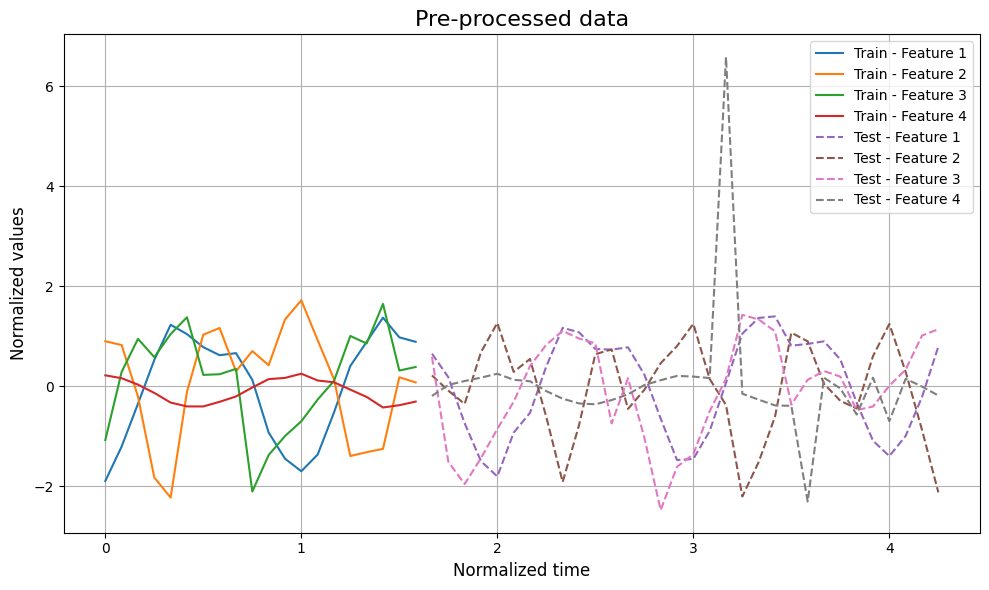

In [10]:
# Graficar datos normalizados
plt.figure(figsize=(10, 6))

# Conjunto de entrenamiento
for i in range(train_y.shape[1]):
    plt.plot(train_t, train_y[:, i], label=f"Train - Feature {i+1}")

# Conjunto de prueba
for i in range(test_y.shape[1]):
    plt.plot(test_t, test_y[:, i], '--', label=f"Test - Feature {i+1}")

plt.title("Pre-processed data", fontsize=16)
plt.xlabel("Normalized time", fontsize=12)
plt.ylabel("Normalized values", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [11]:
len(train_y), len(test_y), len(train_t), len(test_t)

(20, 32, 20, 32)

In [12]:
import torch                  # Para manejar tensores y el backend de cálculo de PyTorch
import torch.nn as nn         # Para definir y trabajar con redes neuronales
import torch.nn.functional as F  # Para funciones de activación y cálculo de pérdidas
from torch.optim import AdamW # Optimizador para entrenar las redes neuronales
from torchdiffeq import odeint # Para integrar las Neural ODEs (requiere instalar torchdiffeq)

In [13]:
# Definir la red neuronal para modelar la dinámica
class NeuralDynamics(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),  # Capa 1
            nn.SiLU(),
            nn.Linear(64, 64),       # Nueva capa 2
            nn.SiLU(),
            nn.Linear(64, 32),        # Capa 3
            nn.SiLU(),
            nn.Linear(32, 32),
            nn.SiLU(),
            nn.Linear(32, input_dim)   # Capa de salida
        )

    def forward(self, t, x):
        return self.net(x)

# Crear la Neural ODE
class NeuralODE(nn.Module):
    def __init__(self, dynamics, solver='dopri5'):
        super().__init__()
        self.dynamics = dynamics
        self.solver = solver

    def forward(self, y0, t):
        return odeint(self.dynamics, y0, t, method=self.solver)

# Entrenar una ronda
def train_one_round(node, y0, y_target, t, optimizer, max_iters):
    for _ in range(max_iters):
        optimizer.zero_grad()
        
        # Predecir con el modelo y ajustar dimensiones
        y_pred = node(y0, t).squeeze()  # Eliminar dimensiones extra
        
        # Calcular la pérdida
        loss = F.mse_loss(y_pred, y_target)
        loss.backward()
        optimizer.step()
    return loss.item() # Devuelve un escalar

# Entrenamiento incremental
def train(train_t, train_y, input_dim, lr=1e-3, max_iters=150):
    losses = []
    num_obs = range(4, len(train_t) + 1, 4)
    dynamics = NeuralDynamics(input_dim)
    node = NeuralODE(dynamics)
    optimizer = AdamW(node.parameters(), lr=lr)

    for k in num_obs:
        # Clonar los tensores para evitar conflictos
        t_subset = train_t[:k].clone()
        y_subset = train_y[:k].clone()
        y0 = y_subset[0].unsqueeze(0)
        
        # Entrenar una ronda
        loss = train_one_round(node, y0, y_subset, t_subset, optimizer, max_iters)
        losses.append(loss)

    return node, losses

# Convertir datos a tensores de PyTorch
train_t_tensor = torch.tensor(train_t, dtype=torch.float32)
train_y_tensor = torch.tensor(train_y, dtype=torch.float32)
test_t_tensor = torch.tensor(test_t, dtype=torch.float32)

# Entrenar el modelo
input_dim = train_y.shape[1] # Número de columnas
node, losses = train(train_t_tensor, train_y_tensor, input_dim)

# Verificar pérdidas
print("Pérdidas en cada etapa:", losses)

# ---- PREDICCIÓN ----

# Concatenar tiempos de entrenamiento y prueba
train_and_test_t_tensor = torch.cat((train_t_tensor, test_t_tensor))

# Predecir toda la dinámica desde el primer estado inicial
y0 = torch.tensor(train_y[0], dtype=torch.float32).unsqueeze(0)
with torch.no_grad():
    y_pred_all = node(y0, train_and_test_t_tensor).numpy().squeeze()

# Separar las predicciones para entrenamiento y prueba
train_y_pred = y_pred_all[:len(train_t)]
test_y_pred = y_pred_all[len(train_t):]

Pérdidas en cada etapa: [0.13740549981594086, 0.13940969109535217, 0.3594895303249359, 0.17023727297782898, 0.14626725018024445]


In [16]:
input_dim

4

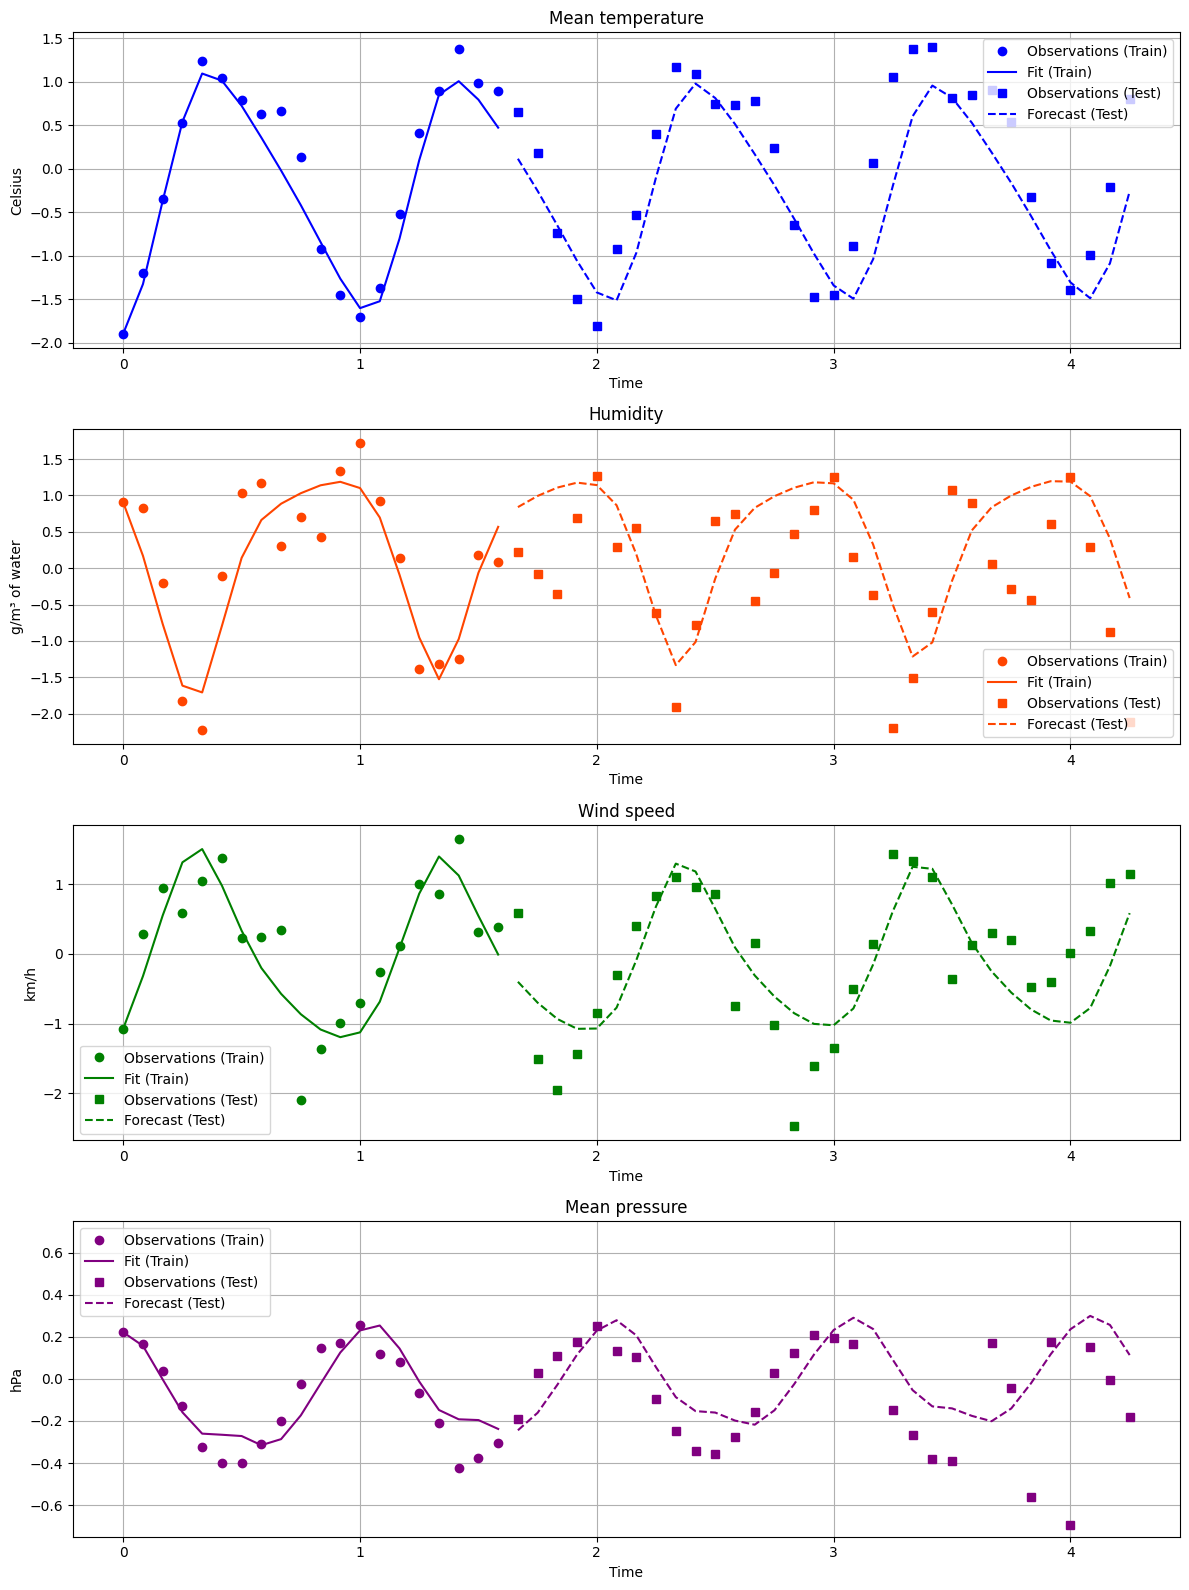

In [14]:
# ---- GRAFICAR RESULTADOS ----
import matplotlib.pyplot as plt

features = ["Mean temperature", "Humidity", "Wind speed", "Mean pressure"]
colors = ["blue", "#FF4500", "green", "purple"]
units = ["Celsius", "g/m³ of water", "km/h", "hPa"]

fig, axs = plt.subplots(4, 1, figsize=(12, 16))

for i, ax in enumerate(axs):
    # Conjunto de entrenamiento
    ax.plot(train_t, train_y[:, i], "o", color=colors[i], label="Observations (Train)")
    ax.plot(train_t, train_y_pred[:, i], "-", color=colors[i], label="Fit (Train)")
    
    # Conjunto de prueba
    ax.plot(test_t, test_y[:, i], "s", color=colors[i], label="Observations (Test)")
    ax.plot(test_t, test_y_pred[:, i], "--", color=colors[i], label="Forecast (Test)")

    # Configurar la gráfica
    ax.set_title(features[i])
    ax.set_xlabel("Time")
    ax.set_ylabel(units[i])
    ax.legend()
    ax.grid()

    # Ajustar la escala de "Mean pressure"
    if features[i] == "Mean pressure":
        ax.set_ylim(-0.75, 0.75)  # Cambia estos valores según lo que necesites

plt.tight_layout()
plt.show()
